In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50

# Employment statistics data

In [35]:
oews = pd.read_csv('oews.csv')
oews.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"139,099,570",0.1,NaN,NaN,NaN,27.07,"56,310",0.1,10.97,13.95,20.17,32.41,50.99,"22,810","29,020","41,950","67,410","106,050",NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"7,947,300",0.2,NaN,NaN,NaN,60.81,"126,480",0.2,24.84,35.70,52.77,76.71,#,"51,670","74,250","109,760","159,550",#,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,minor,"2,601,070",0.4,NaN,NaN,NaN,62.46,"129,920",0.2,21.41,32.57,51.05,80.73,#,"44,530","67,740","106,180","167,930",#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,broad,"202,360",1.0,NaN,NaN,NaN,95.12,"197,840",0.5,30.18,55.06,89.40,#,#,"62,780","114,530","185,950",#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,"202,360",1.0,NaN,NaN,NaN,95.12,"197,840",0.5,30.18,55.06,89.40,#,#,"62,780","114,530","185,950",#,#,NaN,NaN


In [36]:
oews['AREA_TITLE'].unique()

array(['U.S.'], dtype=object)

In [37]:
oews = oews[['OWN_CODE','OCC_CODE','O_GROUP','OCC_TITLE','TOT_EMP','O_GROUP','TOT_EMP','A_MEAN','A_MEDIAN']]

In [38]:
oews['OCC_TITLE']=oews['OCC_TITLE'].str.lower()

In [39]:
ownership_codes = {1: 'Federal Government', 2: 'State Government', 3: 'Local Government', 123: 'Federal, State, and Local Government', 235:'Private, State, and Local Government', 35 : 'Private and Local Government', 5: 'Private', 57:'Private, Local Government Gambling Establishments (Sector 71), and Local Government Casino Hotels (Sector 72)', 58: 'Private plus State and Local Government Hospitals', 59: 'Private and Postal Service', 1235: 'Federal, State, and Local Government and Private Sector'}

In [40]:
oews['OWN_CODE'] = oews['OWN_CODE'].map(ownership_codes)

In [41]:
oews.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,O_GROUP,TOT_EMP,A_MEAN,A_MEDIAN
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570",total,"139,099,570","56,310","41,950"
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300",major,"7,947,300","126,480","109,760"
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070",minor,"2,601,070","129,920","106,180"
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360",broad,"202,360","197,840","185,950"
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360",detailed,"202,360","197,840","185,950"


# Demographics data

In [42]:
age = pd.read_csv('age.csv')
age.head()

,Occupational Title,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,Management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,Chief executives,"1,669",0,7,138,368,465,463,227,52.0
2,General and operations managers,"1,057",3,25,250,290,255,195,39,44.2
3,Legislators,25,0,2,6,1,3,5,8,–
4,Advertising and promotions managers,56,1,1,22,19,11,1,1,36.6


In [43]:
age['Occupational Title']=age['Occupational Title'].str.lower()

In [44]:
age.head()

,Occupational Title,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,chief executives,"1,669",0,7,138,368,465,463,227,52.0
2,general and operations managers,"1,057",3,25,250,290,255,195,39,44.2
3,legislators,25,0,2,6,1,3,5,8,–
4,advertising and promotions managers,56,1,1,22,19,11,1,1,36.6


In [45]:
demo = pd.read_csv('demo2.csv')
demo.head()

,Occupational Title,Employed,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Management, professional, and related occupations","63,644",51.7,78.7,9.7,8.6,10.4
1,"Management, business, and financial operations...","27,143",44.6,81.7,8.8,6.7,10.9
2,Management occupations,"18,564",40.4,83.4,8.0,5.8,10.7
3,Chief executives,"1,669",29.3,88.0,4.3,5.4,7.4
4,General and operations managers,"1,057",30.5,84.4,7.1,4.5,12.4


In [46]:
demo['Occupational Title']=demo['Occupational Title'].str.lower()

# Education/ Training data

In [47]:
edu = pd.read_csv('education.csv')
edu.head()

,Occupational Title,2020 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,None
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,None
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,None
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,None
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,None


In [48]:
edu['Occupational Title']=edu['Occupational Title'].str.lower()

# Merging data

In [49]:
data = oews.merge(edu[['Occupational Title','Typical education needed for entry','Work experience in a related occupation','Typical on-the-job training needed to attain competency in the occupation']],left_on='OCC_TITLE',right_on='Occupational Title',how ='left')

In [50]:
data = data.merge(age,left_on='OCC_TITLE',right_on='Occupational Title', how='left')

In [51]:
data = data.merge(demo[['Occupational Title','Women','White','Black or African American','Asian','Hispanic or Latino']],left_on='OCC_TITLE',right_on='Occupational Title',how='left')

In [52]:
data.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,O_GROUP,TOT_EMP,A_MEAN,A_MEDIAN,Occupational Title_x,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Occupational Title_y,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Occupational Title,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570",total,"139,099,570","56,310","41,950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300",major,"7,947,300","126,480","109,760",NaN,NaN,NaN,NaN,management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9,management occupations,40.4,83.4,8.0,5.8,10.7
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070",minor,"2,601,070","129,920","106,180",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360",broad,"202,360","197,840","185,950",chief executives,Bachelor's degree,5 years or more,None,chief executives,"1,669",0,7,138,368,465,463,227,52.0,chief executives,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360",detailed,"202,360","197,840","185,950",chief executives,Bachelor's degree,5 years or more,None,chief executives,"1,669",0,7,138,368,465,463,227,52.0,chief executives,29.3,88.0,4.3,5.4,7.4


In [53]:
data = data.loc[:,~data.columns.duplicated()]

In [54]:
del data['Occupational Title_x']

In [55]:
del data['Occupational Title_y']

In [56]:
del data['Occupational Title']

In [57]:
data.shape

(1329, 24)

In [58]:
data.isna().sum()*100/len(data)

OWN_CODE                                                                      0.000000
OCC_CODE                                                                      0.000000
O_GROUP                                                                       0.000000
OCC_TITLE                                                                     0.000000
TOT_EMP                                                                       0.000000
A_MEAN                                                                        0.000000
A_MEDIAN                                                                      0.000000
Typical education needed for entry                                           21.369451
Work experience in a related occupation                                      21.369451
Typical on-the-job training needed to attain competency in the occupation    21.369451
Total, 16 years and over                                                     44.620015
16 to 19 years                             

In [59]:
data.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570","56,310","41,950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300","126,480","109,760",NaN,NaN,NaN,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9,40.4,83.4,8.0,5.8,10.7
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070","129,920","106,180",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4


In [60]:
data['Typical on-the-job training needed to attain competency in the occupation'].unique()

array([nan, 'None', 'Moderate-term on-the-job training',
       'Long-term on-the-job training', 'Short-term on-the-job training',
       'Internship/residency', 'Apprenticeship'], dtype=object)

In [61]:
len(data['OCC_TITLE'].unique())

1064

In [62]:
data.to_csv('Job_title_dataset.csv')

In [63]:
data.dropna().head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
5,"Federal, State, and Local Government and Priva...",11-1020,broad,general and operations managers,"2,347,420","125,740","103,650",Bachelor's degree,5 years or more,None,"1,057",3,25,250,290,255,195,39,44.2,30.5,84.4,7.1,4.5,12.4
6,"Federal, State, and Local Government and Priva...",11-1021,detailed,general and operations managers,"2,347,420","125,740","103,650",Bachelor's degree,5 years or more,None,"1,057",3,25,250,290,255,195,39,44.2,30.5,84.4,7.1,4.5,12.4
7,"Federal, State, and Local Government and Priva...",11-1030,broad,legislators,"51,290","53,560","33,200",Bachelor's degree,Less than 5 years,None,25,0,2,6,1,3,5,8,–,–,–,–,–,–


In [64]:
data.describe(include='all')

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
count,1329,1329,1329,1329,1329,1329,1329,1045,1045,1045,736,736,736,736,736,736,736,736,736,736,736,736,736,736
unique,1,1316,5,1064,1019,972,959,8,3,6,301,62,103,170,175,162,151,98,147,283,212,177,129,193
top,"Federal, State, and Local Government and Priva...",13-1020,detailed,tour and travel guides,"10,210",*,"27,080",High school diploma or equivalent,None,None,24,0,0,2,1,0,1,0,–,–,–,–,–,–
freq,1329,2,789,3,4,6,9,436,898,400,14,354,114,33,42,37,40,109,273,273,273,273,273,273


In [65]:
data['Typical education needed for entry'].unique()

array([nan, "Bachelor's degree", 'High school diploma or equivalent',
       "Master's degree", "Associate's degree",
       'Postsecondary nondegree award',
       'No formal educational credential', 'Some college, no degree',
       'Doctoral or professional degree'], dtype=object)

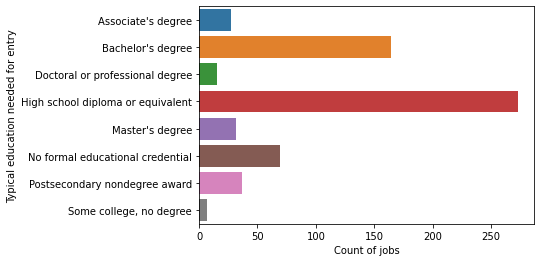

In [66]:
a=pd.DataFrame(data.groupby('Typical education needed for entry').count().Asian)
sns.barplot(y=a.index,x='Asian',data=a)
plt.xlabel('Count of jobs')
plt.show()

In [68]:
data['Typical on-the-job training needed to attain competency in the occupation'].value_counts()

None                                 400
Moderate-term on-the-job training    295
Short-term on-the-job training       227
Long-term on-the-job training         73
Internship/residency                  27
Apprenticeship                        23
Name: Typical on-the-job training needed to attain competency in the occupation, dtype: int64

In [69]:
len(data['OCC_TITLE'].unique())

1064

In [71]:
data.shape

(1329, 24)

In [72]:
data.isna().sum()*100/len(data)

OWN_CODE                                                                      0.000000
OCC_CODE                                                                      0.000000
O_GROUP                                                                       0.000000
OCC_TITLE                                                                     0.000000
TOT_EMP                                                                       0.000000
A_MEAN                                                                        0.000000
A_MEDIAN                                                                      0.000000
Typical education needed for entry                                           21.369451
Work experience in a related occupation                                      21.369451
Typical on-the-job training needed to attain competency in the occupation    21.369451
Total, 16 years and over                                                     44.620015
16 to 19 years                             